## Modeling

### Importing required libraries

In [2]:
#import libraries
import pandas as pd
import statsmodels.tools.tools as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import statsmodels.api as sm
from warnings import filterwarnings
filterwarnings('ignore')
import imblearn.over_sampling as im
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_auc_score,classification_report,f1_score
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#Importing dataset
df=pd.read_csv('model_data.csv')
df.head(5)

,grade,emp_length,loan_status,term_ 60 months,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,...,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,fico_average
0,2,11,0,0,0,0,0,1,0,1,...,2.148332,-0.349616,0.053150,-1.473694,-0.233295,0.011290,1.225422,-1.160265,-0.205881,0.569261
1,3,1,1,1,0,0,0,1,1,0,...,-1.849256,-0.349616,2.542837,-1.473694,-0.233295,-0.739809,-1.395933,-1.603223,-0.205881,0.709417
2,3,11,0,0,0,0,0,1,0,0,...,-0.691230,-0.349616,0.883045,-1.708273,-0.233295,-0.660121,1.747576,-1.071673,-0.205881,0.569261
3,3,11,0,0,0,0,0,1,1,0,...,1.000807,-0.349616,0.053150,0.168359,-0.233295,-0.494215,-0.986677,1.320301,-0.205881,-0.692145
4,2,2,0,1,0,0,0,1,1,0,...,0.691800,-0.349616,-0.776746,1.341254,-0.233295,0.898907,0.174057,1.408893,-0.205881,-0.551989


In [4]:
# Are there any missing values ?
df.isnull().sum().sort_values(ascending=False)

fico_average                           0
pub_rec_bankruptcies                   0
purpose_major_purchase                 0
purpose_house                          0
purpose_home_improvement               0
purpose_educational                    0
purpose_debt_consolidation             0
purpose_credit_card                    0
verification_status_Verified           0
verification_status_Source Verified    0
home_ownership_RENT                    0
home_ownership_OWN                     0
home_ownership_OTHER                   0
home_ownership_NONE                    0
term_ 60 months                        0
loan_status                            0
emp_length                             0
purpose_medical                        0
purpose_moving                         0
purpose_other                          0
delinq_2yrs                            0
total_acc                              0
revol_util                             0
revol_bal                              0
pub_rec         

In [5]:
#summary of data
df.describe()

,grade,emp_length,loan_status,term_ 60 months,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,...,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,fico_average
count,38708.000000,38708.000000,38708.000000,38708.000000,38708.000000,38708.000000,38708.000000,38708.000000,38708.000000,38708.000000,...,3.870800e+04,3.870800e+04,3.870800e+04,3.870800e+04,3.870800e+04,3.870800e+04,3.870800e+04,3.870800e+04,3.870800e+04,3.870800e+04
mean,2.589723,5.974346,0.140539,0.269221,0.000078,0.002532,0.073499,0.478118,0.253668,0.320011,...,1.122757e-17,-3.728580e-15,3.620679e-15,2.739246e-16,-2.247351e-15,2.776561e-16,-1.469712e-15,-2.640947e-15,-2.221073e-15,4.290025e-16
std,1.390201,3.562961,0.347550,0.443561,0.008803,0.050254,0.260957,0.499527,0.435116,0.466487,...,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.999259e+00,-3.496158e-01,-7.767463e-01,-1.708273e+00,-2.332951e-01,-8.457451e-01,-1.727572e+00,-1.780407e+00,-2.058811e-01,-2.514176e+00
25%,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-7.677319e-01,-3.496158e-01,-7.767463e-01,-7.699571e-01,-2.332951e-01,-6.104655e-01,-8.243862e-01,-7.173068e-01,-2.058811e-01,-8.323015e-01
50%,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.378524e-02,-3.496158e-01,5.314952e-02,-6.622003e-02,-2.332951e-01,-2.837239e-01,1.882218e-02,-1.857568e-01,-2.058811e-01,-1.315205e-01
75%,3.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,7.893022e-01,-3.496158e-01,5.314952e-02,6.375171e-01,-2.332951e-01,2.317186e-01,8.302779e-01,6.115681e-01,-2.058811e-01,7.094168e-01
max,7.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.499340e+00,2.860282e+00,2.542837e+00,2.983307e+00,4.286417e+00,8.547733e+00,1.796969e+00,3.003543e+00,4.857172e+00,3.092072e+00


In [6]:
#Determining the shape of the dataset
df.shape

(38708, 36)

In [7]:
#Datatypes of the datafeature
df.dtypes

grade                                    int64
emp_length                               int64
loan_status                              int64
term_ 60 months                          int64
home_ownership_NONE                      int64
home_ownership_OTHER                     int64
home_ownership_OWN                       int64
home_ownership_RENT                      int64
verification_status_Source Verified      int64
verification_status_Verified             int64
purpose_credit_card                      int64
purpose_debt_consolidation               int64
purpose_educational                      int64
purpose_home_improvement                 int64
purpose_house                            int64
purpose_major_purchase                   int64
purpose_medical                          int64
purpose_moving                           int64
purpose_other                            int64
purpose_renewable_energy                 int64
purpose_small_business                   int64
purpose_vacat

### Model preparation

In [8]:
X=df.drop(['loan_status'],axis=1)
y=df['loan_status']

In [9]:
#Checking x shape
X.shape

(38708, 35)

In [10]:
#Checking y shape
y.shape

(38708,)

### Decision Tree

In [11]:
dt =DecisionTreeClassifier(criterion='entropy',random_state=12,max_depth=14)
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=14, random_state=12)

In [12]:
#getting feature importance
col=[]
fi=[]
for i,column in enumerate(X):
    col.append(column)
    fi.append(dt.feature_importances_[i])
data=pd.DataFrame({'columns':col,'fi':fi})
data=data.sort_values('fi',ascending=False).reset_index()
data

,index,columns,fi
0,0,grade,0.119748
1,24,annual_inc,0.112598
2,31,revol_util,0.102153
3,25,dti,0.100287
4,30,revol_bal,0.093691
5,23,installment,0.087903
6,32,total_acc,0.063267
7,22,loan_amnt,0.050989
8,34,fico_average,0.050688
9,1,emp_length,0.038922


In [13]:
#feteching columns with importance
imp=data['columns'][0:32]

In [14]:
X.shape

(38708, 35)

In [15]:
X[imp].shape

(38708, 32)

In [17]:
#taking only the columns that are important
X=X[imp]
X.shape

(38708, 32)

### Checking for multicollinearity using vif

In [20]:
vif=pd.DataFrame()
vif['columns']=X.columns
vif['vif']=[variance_inflation_factor(X.values,i )for i in range (X.shape[1])]
vif.sort_values('vif',ascending=False)

,columns,vif
7,loan_amnt,15.108691
5,installment,13.588770
0,grade,12.594131
22,purpose_debt_consolidation,5.534447
15,pub_rec,4.588347
25,pub_rec_bankruptcies,4.535995
11,term_ 60 months,3.915417
9,emp_length,3.855131
8,fico_average,3.073149
14,home_ownership_RENT,2.559323


**Inference- No Multicollinearity is present in the dataset**

In [26]:
#spliting into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3 ,random_state=10)

In [27]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(27095, 32)
(11613, 32)
(27095,)
(11613,)


### Applying smote because of imbalance in the target

In [28]:
smote = im.SMOTE(sampling_strategy='minority',random_state=1)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [29]:
y_train_res.value_counts()

1    23238
0    23238
Name: loan_status, dtype: int64

## Applying Logistic Regression

In [118]:
#building a logistic regression model

logreg=LogisticRegression(C=75, dual=False,fit_intercept=False, random_state=10, solver='lbfgs')
logreg.fit(X_train_res, y_train_res)

LogisticRegression(C=75, fit_intercept=False, random_state=10)

In [125]:
#getting train scores
print('Train results \n')
y_train_predict = logreg.predict(X_train_res)
model_score = logreg.score(X_train_res, y_train_res)
print(model_score)
print("\n")
print(confusion_matrix(y_train_res, y_train_predict))
print(classification_report(y_train_res, y_train_predict))

Train results 

0.7195756949823565


[[17802  5436]
 [ 7597 15641]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.73     23238
           1       0.74      0.67      0.71     23238

    accuracy                           0.72     46476
   macro avg       0.72      0.72      0.72     46476
weighted avg       0.72      0.72      0.72     46476



In [126]:
#getting test scores
print('\nTest results \n')
y_test_predict = logreg.predict(X_test)
model_score = logreg.score(X_test, y_test)
print(model_score)
print("\n")
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))


Test results 

0.7177301300266942


[[7676 2354]
 [ 924  659]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.82     10030
           1       0.22      0.42      0.29      1583

    accuracy                           0.72     11613
   macro avg       0.56      0.59      0.56     11613
weighted avg       0.80      0.72      0.75     11613



## Naive bayes

In [127]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()
NB_model.fit(X_train_res, y_train_res)

GaussianNB()

In [141]:
#train
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print("\n")
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.3919542350987267


[[ 7743 15495]
 [  980  2877]]
              precision    recall  f1-score   support

           0       0.89      0.33      0.48     23238
           1       0.16      0.75      0.26      3857

    accuracy                           0.39     27095
   macro avg       0.52      0.54      0.37     27095
weighted avg       0.78      0.39      0.45     27095



In [142]:
#test
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print("\n")
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.3786274003272195


[[3224 6806]
 [ 410 1173]]
              precision    recall  f1-score   support

           0       0.89      0.32      0.47     10030
           1       0.15      0.74      0.25      1583

    accuracy                           0.38     11613
   macro avg       0.52      0.53      0.36     11613
weighted avg       0.79      0.38      0.44     11613



## SVM Model

In [130]:
from sklearn import svm

SVM_model= svm.SVC(random_state=1)
SVM_model.fit(X_train_res, y_train_res)

SVC(random_state=1)

In [131]:
## Performance Matrix on train data set
y_train_predict = SVM_model.predict(X_train_res)
model_score = SVM_model.score(X_train_res, y_train_res)
print(model_score)
print("\n")
print(confusion_matrix(y_train_res, y_train_predict))
print(classification_report(y_train_res, y_train_predict))

0.7667183062225665


[[18450  4788]
 [ 6054 17184]]
              precision    recall  f1-score   support

           0       0.75      0.79      0.77     23238
           1       0.78      0.74      0.76     23238

    accuracy                           0.77     46476
   macro avg       0.77      0.77      0.77     46476
weighted avg       0.77      0.77      0.77     46476



In [132]:
## Performance Matrix on test data set
y_test_predict = SVM_model.predict(X_test)
model_score = SVM_model.score(X_test, y_test)
print(model_score)
print("\n")
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.7258245070179971


[[7859 2171]
 [1013  570]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83     10030
           1       0.21      0.36      0.26      1583

    accuracy                           0.73     11613
   macro avg       0.55      0.57      0.55     11613
weighted avg       0.79      0.73      0.75     11613



## Linear Discrimant Analysis Model

In [133]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis()

In [134]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train_res)
model_score = LDA_model.score(X_train_res, y_train_res)
print(model_score)
print("\n")
print(confusion_matrix(y_train_res, y_train_predict))
print(classification_report(y_train_res, y_train_predict))

0.7416300886479043


[[18148  5090]
 [ 6918 16320]]
              precision    recall  f1-score   support

           0       0.72      0.78      0.75     23238
           1       0.76      0.70      0.73     23238

    accuracy                           0.74     46476
   macro avg       0.74      0.74      0.74     46476
weighted avg       0.74      0.74      0.74     46476



In [34]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print("\n")
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.720161206985636


[[6505 1842]
 [ 866  464]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      8347
           1       0.20      0.35      0.26      1330

    accuracy                           0.72      9677
   macro avg       0.54      0.56      0.54      9677
weighted avg       0.79      0.72      0.75      9677



## xgboost in the model

In [135]:
import xgboost as xgb
XGB_SM_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_SM_model.fit(X_train_res, y_train_res)

[21:33:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [136]:
y_train_predict = XGB_SM_model.predict(X_train_res)
model_score = XGB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print("\n")
print(confusion_matrix(y_train_res, y_train_predict))
print(classification_report(y_train_res, y_train_predict))

0.798282984766331


[[20820  2418]
 [ 6957 16281]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82     23238
           1       0.87      0.70      0.78     23238

    accuracy                           0.80     46476
   macro avg       0.81      0.80      0.80     46476
weighted avg       0.81      0.80      0.80     46476



In [137]:
y_train_predict = XGB_SM_model.predict(X_test)
model_score = XGB_SM_model.score(X_test, y_test)
print(model_score)
print("\n")
print(confusion_matrix(y_test, y_train_predict))
print(classification_report(y_test, y_train_predict))

0.8002238870231637


[[8992 1038]
 [1282  301]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     10030
           1       0.22      0.19      0.21      1583

    accuracy                           0.80     11613
   macro avg       0.55      0.54      0.55     11613
weighted avg       0.79      0.80      0.79     11613



## Applying KNN Classifier

In [138]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [139]:
#train
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print("\n")
print(confusion_matrix(y_train_res, y_train_predict))
print(classification_report(y_train_res, y_train_predict))

0.8456622773044152


[[16107  7131]
 [   42 23196]]
              precision    recall  f1-score   support

           0       1.00      0.69      0.82     23238
           1       0.76      1.00      0.87     23238

    accuracy                           0.85     46476
   macro avg       0.88      0.85      0.84     46476
weighted avg       0.88      0.85      0.84     46476



In [140]:
#test
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print("\n")
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.5862395591147852


[[5963 4067]
 [ 738  845]]
              precision    recall  f1-score   support

           0       0.89      0.59      0.71     10030
           1       0.17      0.53      0.26      1583

    accuracy                           0.59     11613
   macro avg       0.53      0.56      0.49     11613
weighted avg       0.79      0.59      0.65     11613



## AdaBooster Classifier

In [41]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train_res,y_train_res)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [42]:
#train
y_train_predict = ADB_model.predict(X_train_res)
model_score = ADB_model.score(X_train_res, y_train_res)
print(model_score)
print("\n")
print(confusion_matrix(y_train_res, y_train_predict))
print(classification_report(y_train_res, y_train_predict))

0.8154167168251675


[[21178  3743]
 [ 5457 19464]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82     24921
           1       0.84      0.78      0.81     24921

    accuracy                           0.82     49842
   macro avg       0.82      0.82      0.82     49842
weighted avg       0.82      0.82      0.82     49842



In [43]:
#test
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print("\n")
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.7667665598842617


[[7063 1284]
 [ 973  357]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      8347
           1       0.22      0.27      0.24      1330

    accuracy                           0.77      9677
   macro avg       0.55      0.56      0.55      9677
weighted avg       0.79      0.77      0.78      9677



## Random forest

In [147]:
from sklearn.ensemble import RandomForestClassifier


rf_model= RandomForestClassifier(random_state=12,max_depth=14)
rf_model.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=14, random_state=12)

In [148]:
# Performance on train data set
y_train_predict = rf_model.predict(X_train_res)
model_score = rf_model.score(X_train_res, y_train_res)
print(model_score)
print("\n")
print(confusion_matrix(y_train_res, y_train_predict))
print(classification_report(y_train_res, y_train_predict))

0.9320509510284878


[[21002  2236]
 [  922 22316]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     23238
           1       0.91      0.96      0.93     23238

    accuracy                           0.93     46476
   macro avg       0.93      0.93      0.93     46476
weighted avg       0.93      0.93      0.93     46476



In [149]:
#performance on test data
y_test_predict = rf_model.predict(X_test)
model_score = rf_model.score(X_test, y_test)
print(model_score)
print("\n")
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.7716352363730302


[[8497 1533]
 [1119  464]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87     10030
           1       0.23      0.29      0.26      1583

    accuracy                           0.77     11613
   macro avg       0.56      0.57      0.56     11613
weighted avg       0.79      0.77      0.78     11613



In [8]:
## space for table

### Using Grid Search to get best paramets

In [150]:
from sklearn.model_selection import GridSearchCV

### Adaboost tuning

### Note - dont run the gridsearch in below cell it takes at least 40 mins to run

In [ ]:
# param=[{'learning_rate':[0.3,0.7,1.0,1.4,1.65],'n_estimators':[100,150,200,250,300]}]
# ADB_model = AdaBoostClassifier(random_state=1)
# adb_grid = GridSearchCV(estimator= ADB_model,
#                         param_grid = param,cv=5)
# adb_grid.fit(X_train_res,y_train_res)
# print('Best parameters for Decision Tree Classifier:',tree_grid.best_params_) 

### best parameters - {'learning_rate': 1.65, 'n_estimators': 300}

### Building the new tuned adaboost model

In [151]:
tuned_ADB_model = AdaBoostClassifier(n_estimators=300,learning_rate=1.65,random_state=1)
tuned_ADB_model.fit(X_train_res,y_train_res)

AdaBoostClassifier(learning_rate=1.65, n_estimators=300, random_state=1)

In [152]:
#train
y_train_predict = tuned_ADB_model.predict(X_train_res)
model_score = tuned_ADB_model.score(X_train_res, y_train_res)
print(model_score)
print('---'*20)
print(confusion_matrix(y_train_res, y_train_predict))
print(classification_report(y_train_res, y_train_predict))

0.8871890868405199
------------------------------------------------------------
[[22137  1101]
 [ 4142 19096]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     23238
           1       0.95      0.82      0.88     23238

    accuracy                           0.89     46476
   macro avg       0.89      0.89      0.89     46476
weighted avg       0.89      0.89      0.89     46476



In [153]:
#test
y_test_predict = tuned_ADB_model.predict(X_test)
model_score = tuned_ADB_model.score(X_test, y_test)
print(model_score)
print('---'*20)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.8349263756135366
------------------------------------------------------------
[[9531  499]
 [1418  165]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     10030
           1       0.25      0.10      0.15      1583

    accuracy                           0.83     11613
   macro avg       0.56      0.53      0.53     11613
weighted avg       0.79      0.83      0.80     11613



### Adaboost Probabibilty tuning

In [155]:
#train data
y_prob_train= tuned_ADB_model.predict_proba(X_train_res)[:,1]
y_pred_train_new=[]
for i in y_prob_train:
    if i<0.4994:
        y_pred_train_new.append(0)
    else:
        y_pred_train_new.append(1)

In [156]:
#test Data
y_prob_test= tuned_ADB_model.predict_proba(X_test)[:,1]
y_pred_test_new=[]
for i in y_prob_test:
    if i<0.49947:
        y_pred_test_new.append(0)
    else:
        y_pred_test_new.append(1)

In [157]:
#post probabilty tuning train scores
model_score = tuned_ADB_model.score(X_train_res, y_pred_train_new)
print(model_score)
print('---'*20)
print(confusion_matrix(y_train_res, y_pred_train_new))
print(classification_report(y_train_res, y_pred_train_new))

0.8246837077201136
------------------------------------------------------------
[[16089  7149]
 [ 2042 21196]]
              precision    recall  f1-score   support

           0       0.89      0.69      0.78     23238
           1       0.75      0.91      0.82     23238

    accuracy                           0.80     46476
   macro avg       0.82      0.80      0.80     46476
weighted avg       0.82      0.80      0.80     46476



In [54]:
#post probabilty tuning test scores
model_score = tuned_ADB_model.score(X_test, y_pred_test_new)
print(model_score)
print('---'*20)
print(confusion_matrix(y_test, y_pred_test_new))
print(classification_report(y_test, y_pred_test_new))

0.7747235713547587
------------------------------------------------------------
[[6242 2105]
 [ 747  583]]
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      8347
           1       0.22      0.44      0.29      1330

    accuracy                           0.71      9677
   macro avg       0.56      0.59      0.55      9677
weighted avg       0.80      0.71      0.74      9677



# Random Forest model tuning

### Note - dont run the gridsearch in below cell it takes at least 40 mins to run

In [158]:
# param=[{'bootstrap': [True,False],
#  'max_leaf_nodes': [5,15,25,40],
#  'n_estimators': [100,150,200]}]
# rf_model= RandomForestClassifier()
# rf_grid = GridSearchCV(estimator= rf_model,
#                          param_grid = param,cv=5)
# rf_grid.fit(X_train_res,y_train_res)
# print('Best parameters for Random Forest:',rf_grid.best_params_)

### best prameters { 'bootstrap': True, 'max_leaf_nodes':40, 'n_estimators':100 }

In [159]:
from sklearn.ensemble import RandomForestClassifier


tuned_rf_model= RandomForestClassifier(bootstrap=True,max_leaf_nodes=40,n_estimators=100,random_state=12)
tuned_rf_model.fit(X_train_res, y_train_res)

RandomForestClassifier(max_leaf_nodes=40, random_state=12)

In [160]:
# Performance on train data set
y_train_predict = tuned_rf_model.predict(X_train_res)
model_score = tuned_rf_model.score(X_train_res, y_train_res)
print(model_score)
print('---'*20)
print(confusion_matrix(y_train_res, y_train_predict))
print(classification_report(y_train_res, y_train_predict))

0.7612316034082107
------------------------------------------------------------
[[18452  4786]
 [ 6311 16927]]
              precision    recall  f1-score   support

           0       0.75      0.79      0.77     23238
           1       0.78      0.73      0.75     23238

    accuracy                           0.76     46476
   macro avg       0.76      0.76      0.76     46476
weighted avg       0.76      0.76      0.76     46476



In [161]:
# Performance on test data set
y_test_predict = tuned_rf_model.predict(X_test)
model_score = tuned_rf_model.score(X_test, y_test)
print(model_score)
print('---'*20)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.7377077413243779
------------------------------------------------------------
[[7951 2079]
 [ 967  616]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.84     10030
           1       0.23      0.39      0.29      1583

    accuracy                           0.74     11613
   macro avg       0.56      0.59      0.56     11613
weighted avg       0.80      0.74      0.76     11613



In [162]:
#train probabilty tuning
y_prob_train= tuned_rf_model.predict_proba(X_train_res)[:,1]
y_pred_train_new=[]
for i in y_prob_train:
    if i<0.46:
        y_pred_train_new.append(0)
    else:
        y_pred_train_new.append(1)

In [163]:
#test probabilty tuning
y_prob_test= tuned_rf_model.predict_proba(X_test)[:,1]
y_pred_test_new=[]
for i in y_prob_test:
    if i<0.46:
        y_pred_test_new.append(0)
    else:
        y_pred_test_new.append(1)

In [164]:
#post probabilty tuning train scores
model_score = tuned_rf_model.score(X_train_res, y_pred_train_new)
print(model_score)
print('---'*20)
print(confusion_matrix(y_train_res, y_pred_train_new))
print(classification_report(y_train_res, y_pred_train_new))

0.9042516567690851
------------------------------------------------------------
[[15902  7336]
 [ 4411 18827]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73     23238
           1       0.72      0.81      0.76     23238

    accuracy                           0.75     46476
   macro avg       0.75      0.75      0.75     46476
weighted avg       0.75      0.75      0.75     46476



In [176]:
#post porbability tuning test scores
model_score = tuned_rf_model.score(X_test, y_pred_test_new)
print(model_score)
print('---'*40)
print(confusion_matrix(y_test, y_pred_test_new))
print(classification_report(y_test, y_pred_test_new))

0.8805648841815207
------------------------------------------------------------------------------------------------------------------------
[[6814 3216]
 [ 717  866]]
              precision    recall  f1-score   support

           0       0.90      0.68      0.78     10030
           1       0.21      0.55      0.31      1583

    accuracy                           0.66     11613
   macro avg       0.56      0.61      0.54     11613
weighted avg       0.81      0.66      0.71     11613



**inference - rf forest best result with test and train recall and accuracy

## Cross Validation

In [168]:
#train data
from sklearn.model_selection import cross_val_score
scores_train = cross_val_score(tuned_rf_model, X_train_res, y_pred_train_new, cv=10)
scores_train

array([0.90813253, 0.91006885, 0.91372633, 0.89866609, 0.87306368,
       0.8689759 , 0.86679578, 0.87239079, 0.88293523, 0.91650527])

In [170]:
print("the average train accuracy of the model is :  ",scores_train.mean())

the average train accuracy of the model is :   0.8911260461934429


In [171]:
#test data
scores_test = cross_val_score(tuned_rf_model, X_test, y_pred_test_new, cv=10)
scores_test

array([0.90189329, 0.89414802, 0.89414802, 0.89750215, 0.89233419,
       0.88975022, 0.86821705, 0.8828596 , 0.88888889, 0.88716624])

In [172]:
print("the average test accuracy of the model is :  ",scores_test.mean())

the average test accuracy of the model is :   0.8896907674996776


## Model Prediction

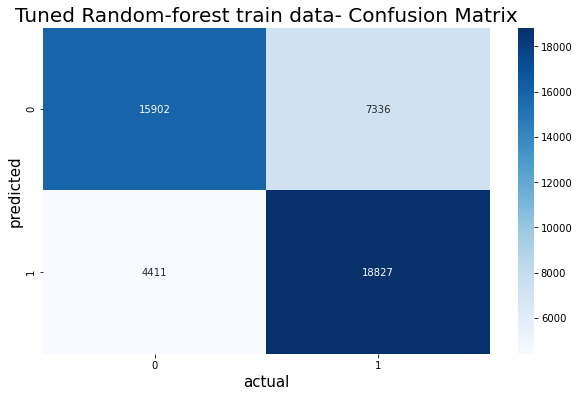

In [173]:
#train data info
cm=confusion_matrix(y_train_res,y_pred_train_new)
plt.figure(figsize=((10,6)))
sns.heatmap(cm,annot=True,cmap='Blues',fmt='.0f')
plt.title("Tuned Random-forest train data- Confusion Matrix",fontsize=20)
plt.xlabel("actual",fontsize=15)
plt.ylabel("predicted",fontsize=15)
plt.show()

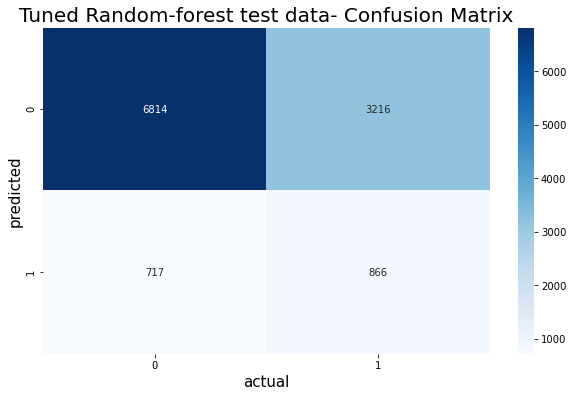

In [174]:
#test data info
cm=confusion_matrix(y_test,y_pred_test_new)
plt.figure(figsize=((10,6)))
sns.heatmap(cm,annot=True,cmap='Blues',fmt='.0f')
plt.title("Tuned Random-forest test data- Confusion Matrix",fontsize=20)
plt.xlabel("actual",fontsize=15)
plt.ylabel("predicted",fontsize=15)
plt.show()